In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import os,sys
opj = os.path.join
from tqdm import tqdm
import acd
from copy import deepcopy
from model_GMM import init_specific_model
from losses_GMM import BetaLoss, BtcvaeLoss
from dset_GMM import get_dataloaders
from training import Trainer
from utils import *

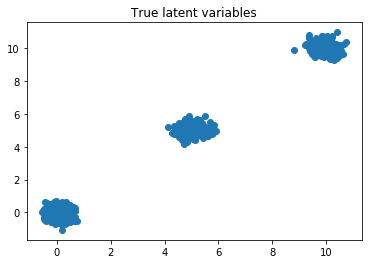

In [2]:
# GET DATALOADERS
train_loader, train_latents = get_dataloaders(n_samples_per_cluster=5000, 
                                              batch_size=100, 
                                              shuffle=True,
                                              return_latents=True)
test_loader, test_latents = get_dataloaders(n_samples_per_cluster=200, 
                                            batch_size=100, 
                                            shuffle=False,
                                            return_latents=True)

# PLOT LATENT VARIABLES
plot_2d_samples(test_latents)
plt.title('True latent variables')
plt.show()

In [23]:
# PREPARES MODEL
model = init_specific_model(orig_dim=10, latent_dim=2)
model = model.to(device)
# LOAD MODEL
beta = 1
attr_lamb = 20.0
model.load_state_dict(torch.load("results/" + "beta" + str(beta) + "_attr" + str(attr_lamb)))

# TRAINS
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_f = BetaLoss(beta=beta)

trainer = Trainer(model, optimizer, loss_f, device=device, attr_lamb=attr_lamb)

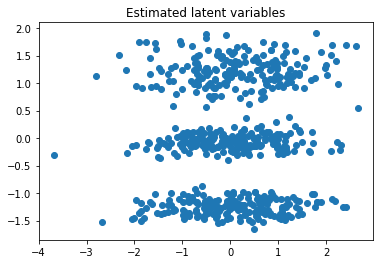

In [24]:
# EVALUATE TEST DATA
data = test_loader.dataset.data.to(device)
recon_data, latent_dist, latent_sample = model(data)

plot_2d_samples(latent_sample.detach().cpu())
plt.title('Estimated latent variables')
plt.show()

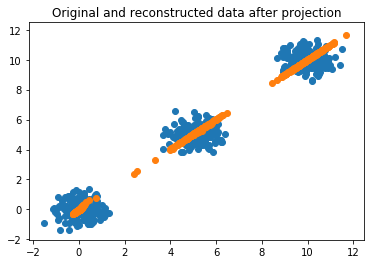

In [25]:
plot_2d_samples(data.detach().cpu()[:,:2])
plot_2d_samples(recon_data.detach().cpu()[:,:2])
plt.title('Original and reconstructed data after projection')
plt.show()

In [26]:
print('Pen: {:.8f}'.format(trainer._comp_latent_pen(latent_sample, data).item()))

Pen: 0.00011298


###  PLOT TRAVERSALS

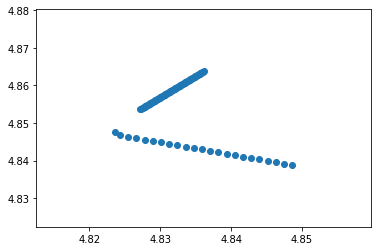

In [27]:
# GET TRAVERSAL
decoded_traversal = traversals(model, data=None)

# PROJECTION to FIRST TWO COORDINATES
decoded_traversal0 = decoded_traversal[:,:2]
plot_2d_samples(decoded_traversal0[:100])

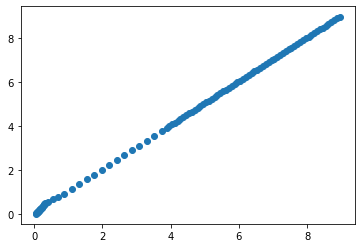

In [28]:
plot_2d_samples(decoded_traversal0[100:])

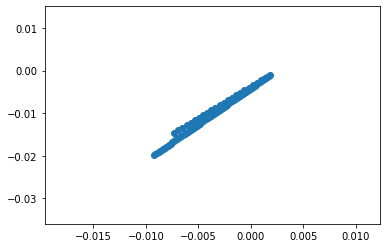

In [29]:
# PROJECTION to SECOND TWO COORDINATES
decoded_traversal1 = decoded_traversal[:,2:4]
plot_2d_samples(decoded_traversal1[:100])

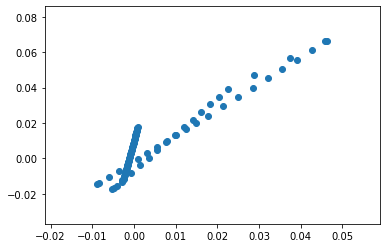

In [30]:
plot_2d_samples(decoded_traversal1[100:])

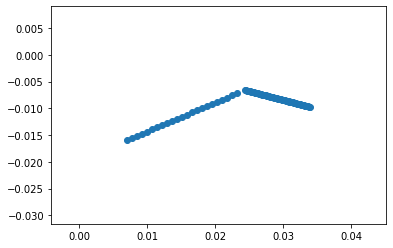

In [31]:
# PROJECTION to THIRD TWO COORDINATES
decoded_traversal2 = decoded_traversal[:,4:6]
plot_2d_samples(decoded_traversal2[:100])

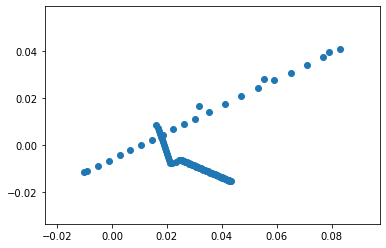

In [32]:
plot_2d_samples(decoded_traversal2[100:])

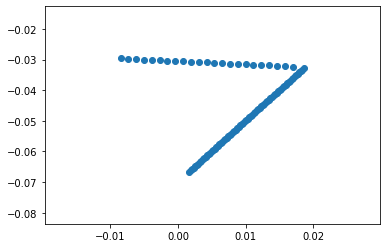

In [33]:
# PROJECTION to FOURTH TWO COORDINATES
decoded_traversal3 = decoded_traversal[:,6:8]
plot_2d_samples(decoded_traversal3[:100])

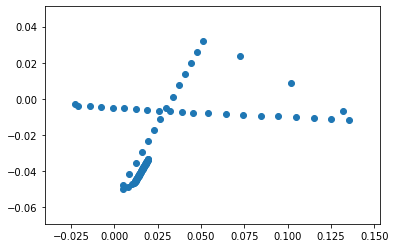

In [34]:
plot_2d_samples(decoded_traversal3[100:])

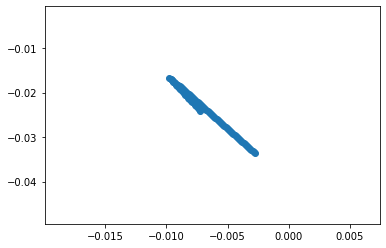

In [35]:
# PROJECTION to FIFTH TWO COORDINATES
decoded_traversal4 = decoded_traversal[:,8:10]
plot_2d_samples(decoded_traversal4[:100])

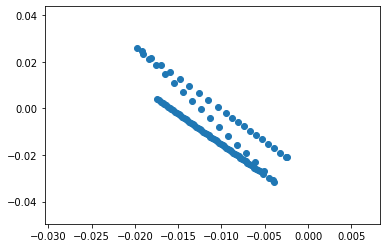

In [36]:
plot_2d_samples(decoded_traversal4[100:])